In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, mean_squared_error, roc_auc_score, roc_curve

df = pd.read_csv('scaled_smoking_drinking_dataset.csv')

y_drinking = df.loc[:, 'DRK_YN']
y_smoking = df.loc[:, 'SMK_stat_type_cd']
X = df.drop(['DRK_YN', 'SMK_stat_type_cd'], axis=1)

X_train_drinking, X_test_drinking, y_train_drinking, y_test_drinking = train_test_split(X, y_drinking, test_size=0.25, random_state=21)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X, y_smoking,   test_size=0.25, random_state=21)

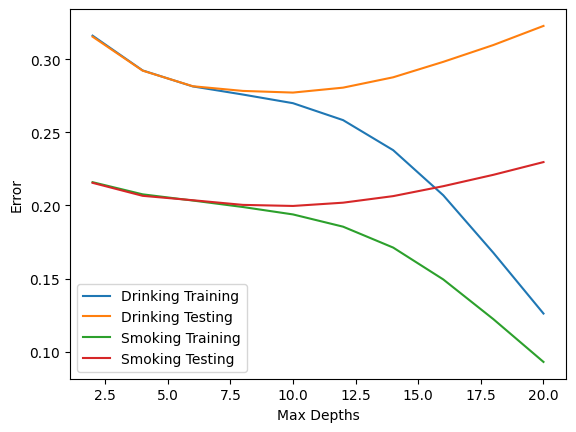

In [ ]:
# Decision Trees
max_depths = [2,4,6,8,10,12,14,16,18,20]

training_drinking_results = []
testing_drinking_results = []

training_smoking_results = []
testing_smoking_results = []

for max_depth in max_depths:
  dtreeD1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD1 = dtreeD1.fit(X_train_drinking, y_train_drinking)
  y_predD1 = dtreeD1.predict(X_train_drinking)
  dtreeD2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD2 = dtreeD2.fit(X_train_drinking, y_train_drinking)
  y_predD2 = dtreeD2.predict(X_test_drinking)
  training_drinking_results.append(1 - accuracy_score(y_train_drinking, y_predD1))
  testing_drinking_results.append(1 - accuracy_score(y_test_drinking, y_predD2))

  dtreeS1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS1 = dtreeS1.fit(X_train_smoking, y_train_smoking)
  y_predS1 = dtreeS1.predict(X_train_smoking)
  dtreeS2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS2 = dtreeS2.fit(X_train_smoking, y_train_smoking)
  y_predS2 = dtreeS2.predict(X_test_smoking)
  training_smoking_results.append(1 - accuracy_score(y_train_smoking, y_predS1))
  testing_smoking_results.append(1 - accuracy_score(y_test_smoking, y_predS2))

plt.plot(max_depths, training_drinking_results, label="Drinking Training")
plt.plot(max_depths, testing_drinking_results, label="Drinking Testing")
plt.plot(max_depths, training_smoking_results, label="Smoking Training")
plt.plot(max_depths, testing_smoking_results, label="Smoking Testing")
plt.legend(loc='best')
plt.xlabel("Max Depths")
plt.ylabel("Error")
plt.show()

In [3]:
dtreeD = DecisionTreeClassifier(max_depth=10)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD1 = dtreeD.predict(X_train_drinking)
dtreeD = DecisionTreeClassifier(max_depth=10)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD2 = dtreeD.predict(X_test_drinking)

dtreeS = DecisionTreeClassifier(max_depth=10)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS1 = dtreeS.predict(X_train_smoking)
dtreeS = DecisionTreeClassifier(max_depth=10)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS2 = dtreeS.predict(X_test_smoking)

print("Drinking:")
print("Training Set:")
print("Error: {}, Accuracy: {}, F1: {}, AUC: {}".format(1 - accuracy_score(y_train_drinking, y_predD1), accuracy_score(y_train_drinking, y_predD1),
                                                        f1_score(y_train_drinking, y_predD1), roc_auc_score(y_train_drinking, y_predD1)))
print("Test Set:")
print("Error: {}, Accuracy: {}, F1: {}, AUC: {}".format(1 - accuracy_score(y_test_drinking, y_predD2), accuracy_score(y_test_drinking, y_predD2),
                                                        f1_score(y_test_drinking, y_predD2), roc_auc_score(y_test_drinking, y_predD2)))

print("Smoking:")
print("Training Set:")
print("Error: {}, Accuracy: {}, F1: {}, AUC: {}".format(1 - accuracy_score(y_train_smoking, y_predS1), accuracy_score(y_train_smoking, y_predS1),
                                                        f1_score(y_train_smoking, y_predS1), roc_auc_score(y_train_smoking, y_predS1)))
print("Test Set:")
print("Error: {}, Accuracy: {}, F1: {}, AUC: {}".format(1 - accuracy_score(y_test_smoking, y_predS2), accuracy_score(y_test_smoking, y_predS2),
                                                        f1_score(y_test_smoking, y_predS2), roc_auc_score(y_test_smoking, y_predS2)))

Drinking:
Training Set:
Error: 0.2699832819777568, Accuracy: 0.7300167180222432, F1: 0.7336336675048599, AUC: 0.7300178369912973
Test Set:
Error: 0.27722656423375036, Accuracy: 0.7227734357662496, F1: 0.726827425799654, AUC: 0.7227930621521262
Smoking:
Training Set:
Error: 0.193873914101914, Accuracy: 0.806126085898086, F1: 0.4000249734656927, AUC: 0.6225077062531852
Test Set:
Error: 0.19964734886235713, Accuracy: 0.8003526511376429, F1: 0.38021394393366237, AUC: 0.6131576329399256


In [6]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_drinking, y_train_drinking)
y_pred = gnb.predict(X_test_drinking)
print("Naive Bayes - Drinking")
print("Testing Set: Accuracy: {}, Precision: {}, Recall: {}, F1: {}".format(accuracy_score(y_test_drinking, y_pred), precision_score(y_test_drinking, y_pred),
                                                                            recall_score(y_test_drinking, y_pred), f1_score(y_test_drinking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Smoking")
print("Testing Set: Accuracy: {}, Precision: {}, Recall: {}, F1: {}".format(accuracy_score(y_test_smoking, y_pred), precision_score(y_test_smoking, y_pred),
                                                                            recall_score(y_test_smoking, y_pred), f1_score(y_test_smoking, y_pred)))

Naive Bayes - Drinking
Testing Set: Accuracy: 0.6856603332028712, Precision: 0.6908485579924258, Recall: 0.6706473611066223, F1: 0.6805980919113276
Naive Bayes - Smoking
Testing Set: Accuracy: 0.7222488974608311, Precision: 0.4131088462188186, Recall: 0.686851664606973, F1: 0.5159176095808046
